# Colab 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
fish = pd.read_csv(io.BytesIO(myfile['fish1.csv']),
                       encoding='cp949')
fish

# 로컬 데이터 로드

In [1]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
fish = pd.read_csv('fish1.csv',encoding='cp949')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [2]:
# 생성 데이터 프레임에서, 도미와 방어의 데이터로 분리 ( df.loc 추천 )
# 도미 : Species가 Bream인 행
# 두께 : Width
# 무게 : Weight
도미_두께 = fish.loc[(fish['Species'] =='Bream'), 'Width']
도미_무게 = fish.loc[(fish['Species'] =='Bream'), 'Weight']
print('도미수:',len(도미_두께))

빙어_두께 = fish.loc[(fish['Species'] =='Smelt'), 'Width']
빙어_무게 = fish.loc[(fish['Species'] =='Smelt'), 'Weight']
print('빙어수:',len(빙어_두께))


도미수: 35
빙어수: 14


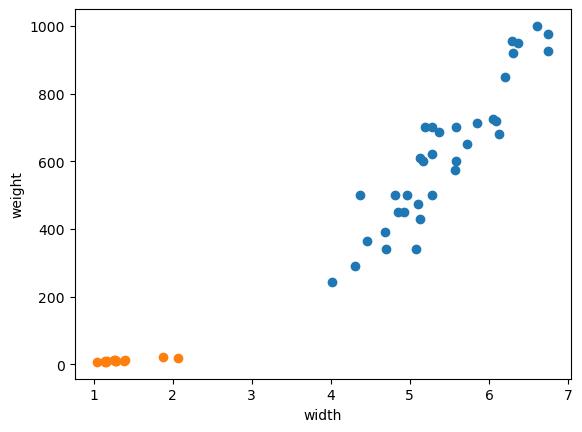

In [3]:
import matplotlib.pyplot as plt

# 도미와 방어의 두께, 무게 산점도 그리기
plt.scatter(도미_두께, 도미_무게)
plt.scatter(빙어_두께, 빙어_무게)
plt.xlabel('width')
plt.ylabel('weight')
plt.show()

In [4]:
import numpy as np

# 가로로 나열되어 있는 Weight와 Width 세로로 합쳐서 data 만들기
data = np.column_stack((fish.Weight, fish.Width))

# 물고기 종류로 target 만들기
target = fish.Species

print(data)
print(target)

[[ 242.        4.02  ]
 [ 290.        4.3056]
 [ 340.        4.6961]
 [ 363.        4.4555]
 [ 430.        5.134 ]
 [ 450.        4.9274]
 [ 500.        5.2785]
 [ 390.        4.69  ]
 [ 450.        4.8438]
 [ 500.        4.9594]
 [ 475.        5.1042]
 [ 500.        4.8146]
 [ 500.        4.368 ]
 [ 340.        5.0728]
 [ 600.        5.1708]
 [ 600.        5.58  ]
 [ 700.        5.2854]
 [ 700.        5.1975]
 [ 610.        5.1338]
 [ 650.        5.7276]
 [ 575.        5.5695]
 [ 685.        5.3704]
 [ 620.        5.2801]
 [ 680.        6.1306]
 [ 700.        5.589 ]
 [ 725.        6.0532]
 [ 720.        6.09  ]
 [ 714.        5.8515]
 [ 850.        6.1984]
 [1000.        6.603 ]
 [ 920.        6.3063]
 [ 955.        6.292 ]
 [ 925.        6.7497]
 [ 975.        6.7473]
 [ 950.        6.3705]
 [   6.7       1.0476]
 [   7.5       1.16  ]
 [   7.        1.1484]
 [   9.7       1.38  ]
 [   9.8       1.2772]
 [   8.7       1.2852]
 [  10.        1.2838]
 [   9.9       1.1659]
 [   9.8   

In [6]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(
    data, target, random_state=40)

print(훈련용_data.shape, 테스트용_data.shape, 훈련용_target.shape, 테스트용_target.shape)


(36, 2) (13, 2) (36,) (13,)


In [7]:
# KNN 라이브러리 Import
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=5)

# KNN 모델 학습
knn.fit(훈련용_data, 훈련용_target)

# score 출력
knn.score(테스트용_data, 테스트용_target)

1.0

In [8]:
# 데이터 넣어서 결과 확인 : ['Smelt']
print(knn.predict([[25, 1.5]]))   

['Smelt']


In [9]:
# 데이터 넣어서 결과 확인 : ['Bream']
print(knn.predict([[250, 5.1]]))   

['Bream']
